# 5. 蜡烛图形态
**用TA_Lib寻找蜡烛图特征**

## 目录
- 蜡烛图是什么？
- 蜡烛图的两大用途是什么？
- 常见蜡烛图是怎么计算的？
- 蜡烛图如何用图表显示，并用TA_Lib寻找蜡烛图？

## 蜡烛图是什么？
蜡烛图又称为K线图，主要包含四个数据，即开盘价、最高价、最低价、收盘价，所有的蜡烛图都是围绕这四个数据展开，反映大势的状况和价格信息。如果把每日的K线图放在一张图中，就能得到日K线图，同样也可画出周K线图、月K线图。

## 蜡烛图的两大用途是什么？
1. 判断反转信号
2. 判断持续信号

## 常见蜡烛图是怎么计算的？
---
### 1. 大阳线: 涨幅大于5%，上下影线小于1.8%

$Close/Open>1.05$

$High/Low < Close/Open+0.018$

---

### 2. 大阴线： 跌幅大于5%， 上下影线小于1.8%

$Open/Close > 1.05$

$High/Low < Open/Close+0.018$

---

### 3.下影线

$(Min(Close,Open)-Low)/(High-Low)>0.667$

---

### 4. 上影线
$(High-Max(Close,Open))/(High-Low)>0.667$

---

### 5.十字星
$Close-Open<Abs(0.001)$

$High-Low>0.001$

### 6. 缺口Gap
$open[-1]-close[-2]>0.01$

## 蜡烛图如何用图表显示，并用TA_Lib寻找蜡烛图？

In [3]:
import talib as ta
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY, date2num
from datetime import datetime
from mpl_finance import candlestick_ochl

quotes = ts.get_k_data('600036', start='2016-11-01', end='2016-12-31', ktype='D',autype='qfq')
quotes['datetime'] = pd.to_datetime(quotes['date'],format='%Y-%m-%d')
quotes['date']=[date2num(datetime.strptime(date, '%Y-%m-%d')) for date in quotes.date]
quotes.index = quotes.datetime
quotes.pop('datetime')

print quotes.head()

                date   open  close   high    low    volume    code
datetime                                                          
2016-11-01  736269.0  17.87  17.98  17.99  17.79  189405.0  600036
2016-11-02  736270.0  17.86  17.84  17.94  17.76  309535.0  600036
2016-11-03  736271.0  17.83  17.93  17.97  17.79  270809.0  600036
2016-11-04  736272.0  17.90  17.91  18.00  17.87  269388.0  600036
2016-11-07  736275.0  17.91  17.89  17.93  17.85  208258.0  600036


In [4]:
candle_list = []
for i in range(len(quotes)):
    candle_list.append(quotes.iloc[i, 0:5])

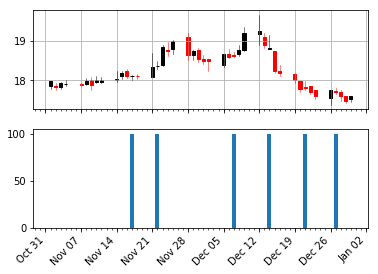

In [5]:
mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ochl(ax, candle_list, width=0.6)
ax.xaxis_date()
ax.autoscale_view()
ax.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

Doji = ta.abstract.CDLDOJI(quotes)
quotes['Doji'] = Doji
ax1.bar(quotes.index, quotes.Doji)
plt.show()

## 作业
根据上面代码寻找其他蜡烛图形态。